### 資料分析：機場變因
目標：出發/抵達機場，【航班總數】、【延誤比率】 分析

In [14]:
import os
import numpy as np
import pandas as pd
from dataclasses import dataclass 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# 提高jupyter notebook圖形顯示的解析度
%config InlineBackend. figure_format = 'retina'

### 參數設定

In [15]:
@dataclass
class Path:
    read: str = '../data_read/'
    
    write: str = '../data_write/'

    imgs: str = '../imgs/'

class Data:
    dataset: str = 'US_1722_flights_dataset_v1_IQR.csv'

class Config:
    # delay 級距寬度
    delaymin: int = 5

    # flights 排名數
    f_rank: int = 20

    # delay_rate 排名數
    d_rank: int = 20

### 讀入 Dataset

In [16]:
# 讀取檔案，篩選欄位
usecols = ['flight_num', 'airport_depa', 'airport_dest', 'delay_dest', 'actu_duration']
df_flights = pd.read_csv(os.path.join(Path.write, Data.dataset), usecols=usecols)


# 刪除 取消飛行 的航班
df_flights = df_flights[df_flights['actu_duration'] != 0]

### 建立資料表：資料分析

建立資料分析用資料表：depa

In [17]:
df_airport_depa = pd.DataFrame(columns=[])
df_airport_depa['flights'] = df_flights.groupby('airport_depa').count()[['flight_num']]
df_airport_depa['delay_dest'] = df_flights[df_flights['delay_dest'] > Config.delaymin].groupby('airport_depa').count()[['flight_num']]
df_airport_depa['delay_rate'] = df_airport_depa['delay_dest'] / df_airport_depa['flights']

建立資料分析用資料表：dest

In [18]:
df_airport_dest = pd.DataFrame(columns=[])
df_airport_dest['flights'] = df_flights.groupby('airport_dest').count()[['flight_num']]
df_airport_dest['delay_dest'] = df_flights[df_flights['delay_dest'] > Config.delaymin].groupby('airport_depa').count()[['flight_num']]
df_airport_dest['delay_rate'] = df_airport_dest['delay_dest'] / df_airport_dest['flights']

### 資料分析：DataFrame

depa 機場【航班總數】排名

In [19]:
df_airport_depa = df_airport_depa.sort_values('flights', ascending=False)
df_airport_depa = df_airport_depa.reset_index(drop=False)

depa 機場【航班總數前 20 名】排名

In [20]:
df_airport_depa_20 = df_airport_depa.nlargest(Config.f_rank, 'flights')
df_airport_depa_20 = df_airport_depa_20.reset_index()
df_airport_depa_20 = df_airport_depa_20.drop('index', axis=1)

dest 機場【航班總數】排名

In [21]:
df_airport_dest = df_airport_dest.sort_values('flights', ascending=False)
df_airport_dest = df_airport_dest.reset_index(drop=False)

dest 機場【航班總數前 20 名】排名

In [22]:
df_airport_dest_20 = df_airport_dest.nlargest(Config.f_rank, 'flights')
df_airport_dest_20 = df_airport_dest_20.reset_index()
df_airport_dest_20 = df_airport_dest_20.drop('index', axis=1)

### 繪圖：Barchart、Linechart

depa 機場 依【航班總數】排名的【航班總數】

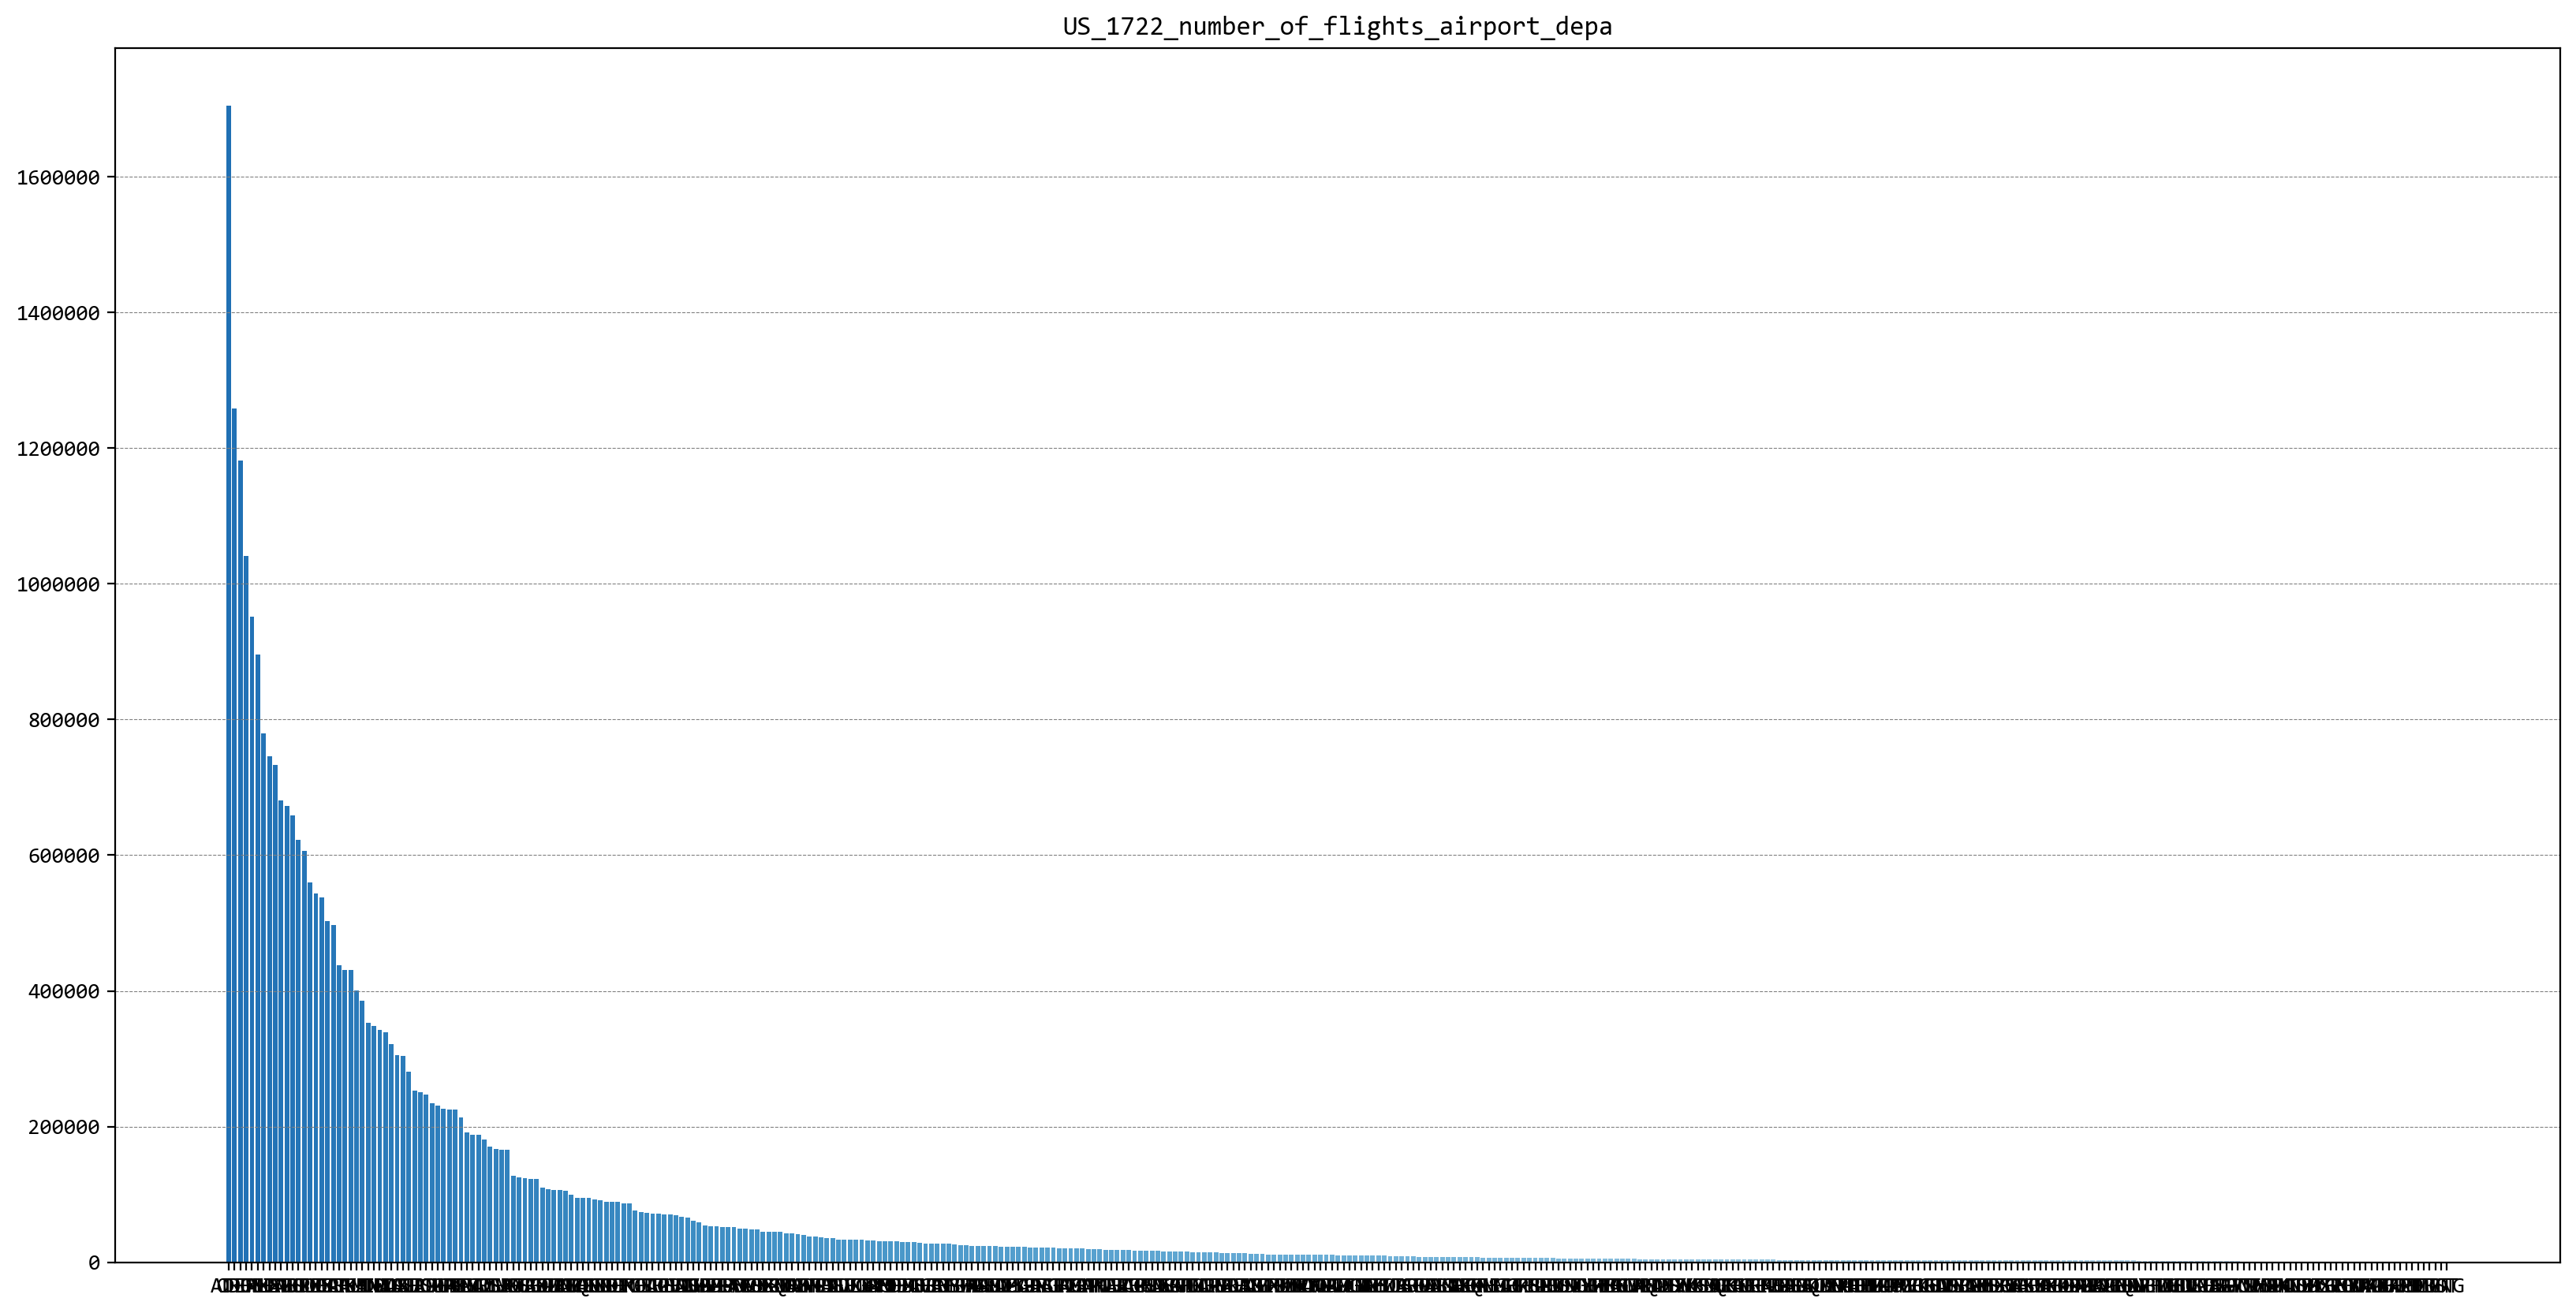

In [23]:
'''準備繪圖設定'''
# 清除 matplotlib 的繪圖緩存
plt.close()
# 建立新繪圖區、設定畫布大小
plt.figure(figsize=(20, 10))
# 設定字型：等寬字體
plt.rcParams['font.sans-serif'] = ['Consolas']
# 設定顏色：漸層
colors_depa = plt.cm.Blues(np.linspace(0.75, 0.25, len(df_airport_depa['airport_depa'])))


'''長條圖：【航班總數】'''
# 繪圖
bar_depa = plt.bar(df_airport_depa['airport_depa'],
                   df_airport_depa['flights'],
                   color=colors_depa)
# 設定 y 軸：標籤不顯示科學符號
plt.ticklabel_format(style='plain',
                     axis='y')
# 設定輔助線
plt.grid(True,
         axis='y',
         lw=.4,
         ls='--',
         c='gray')


'''繪圖輸出'''
# 設定圖表名稱
plt.title('US_1722_number_of_flights_airport_depa')
# 顯示圖表
plt.show()
# # 另存新檔
# plt.savefig('../imgs/US_1722_number_of_flights_airport_depa.png')

depa 機場 依【航班總數前20名】排名的【航班總數】、【延誤比率】

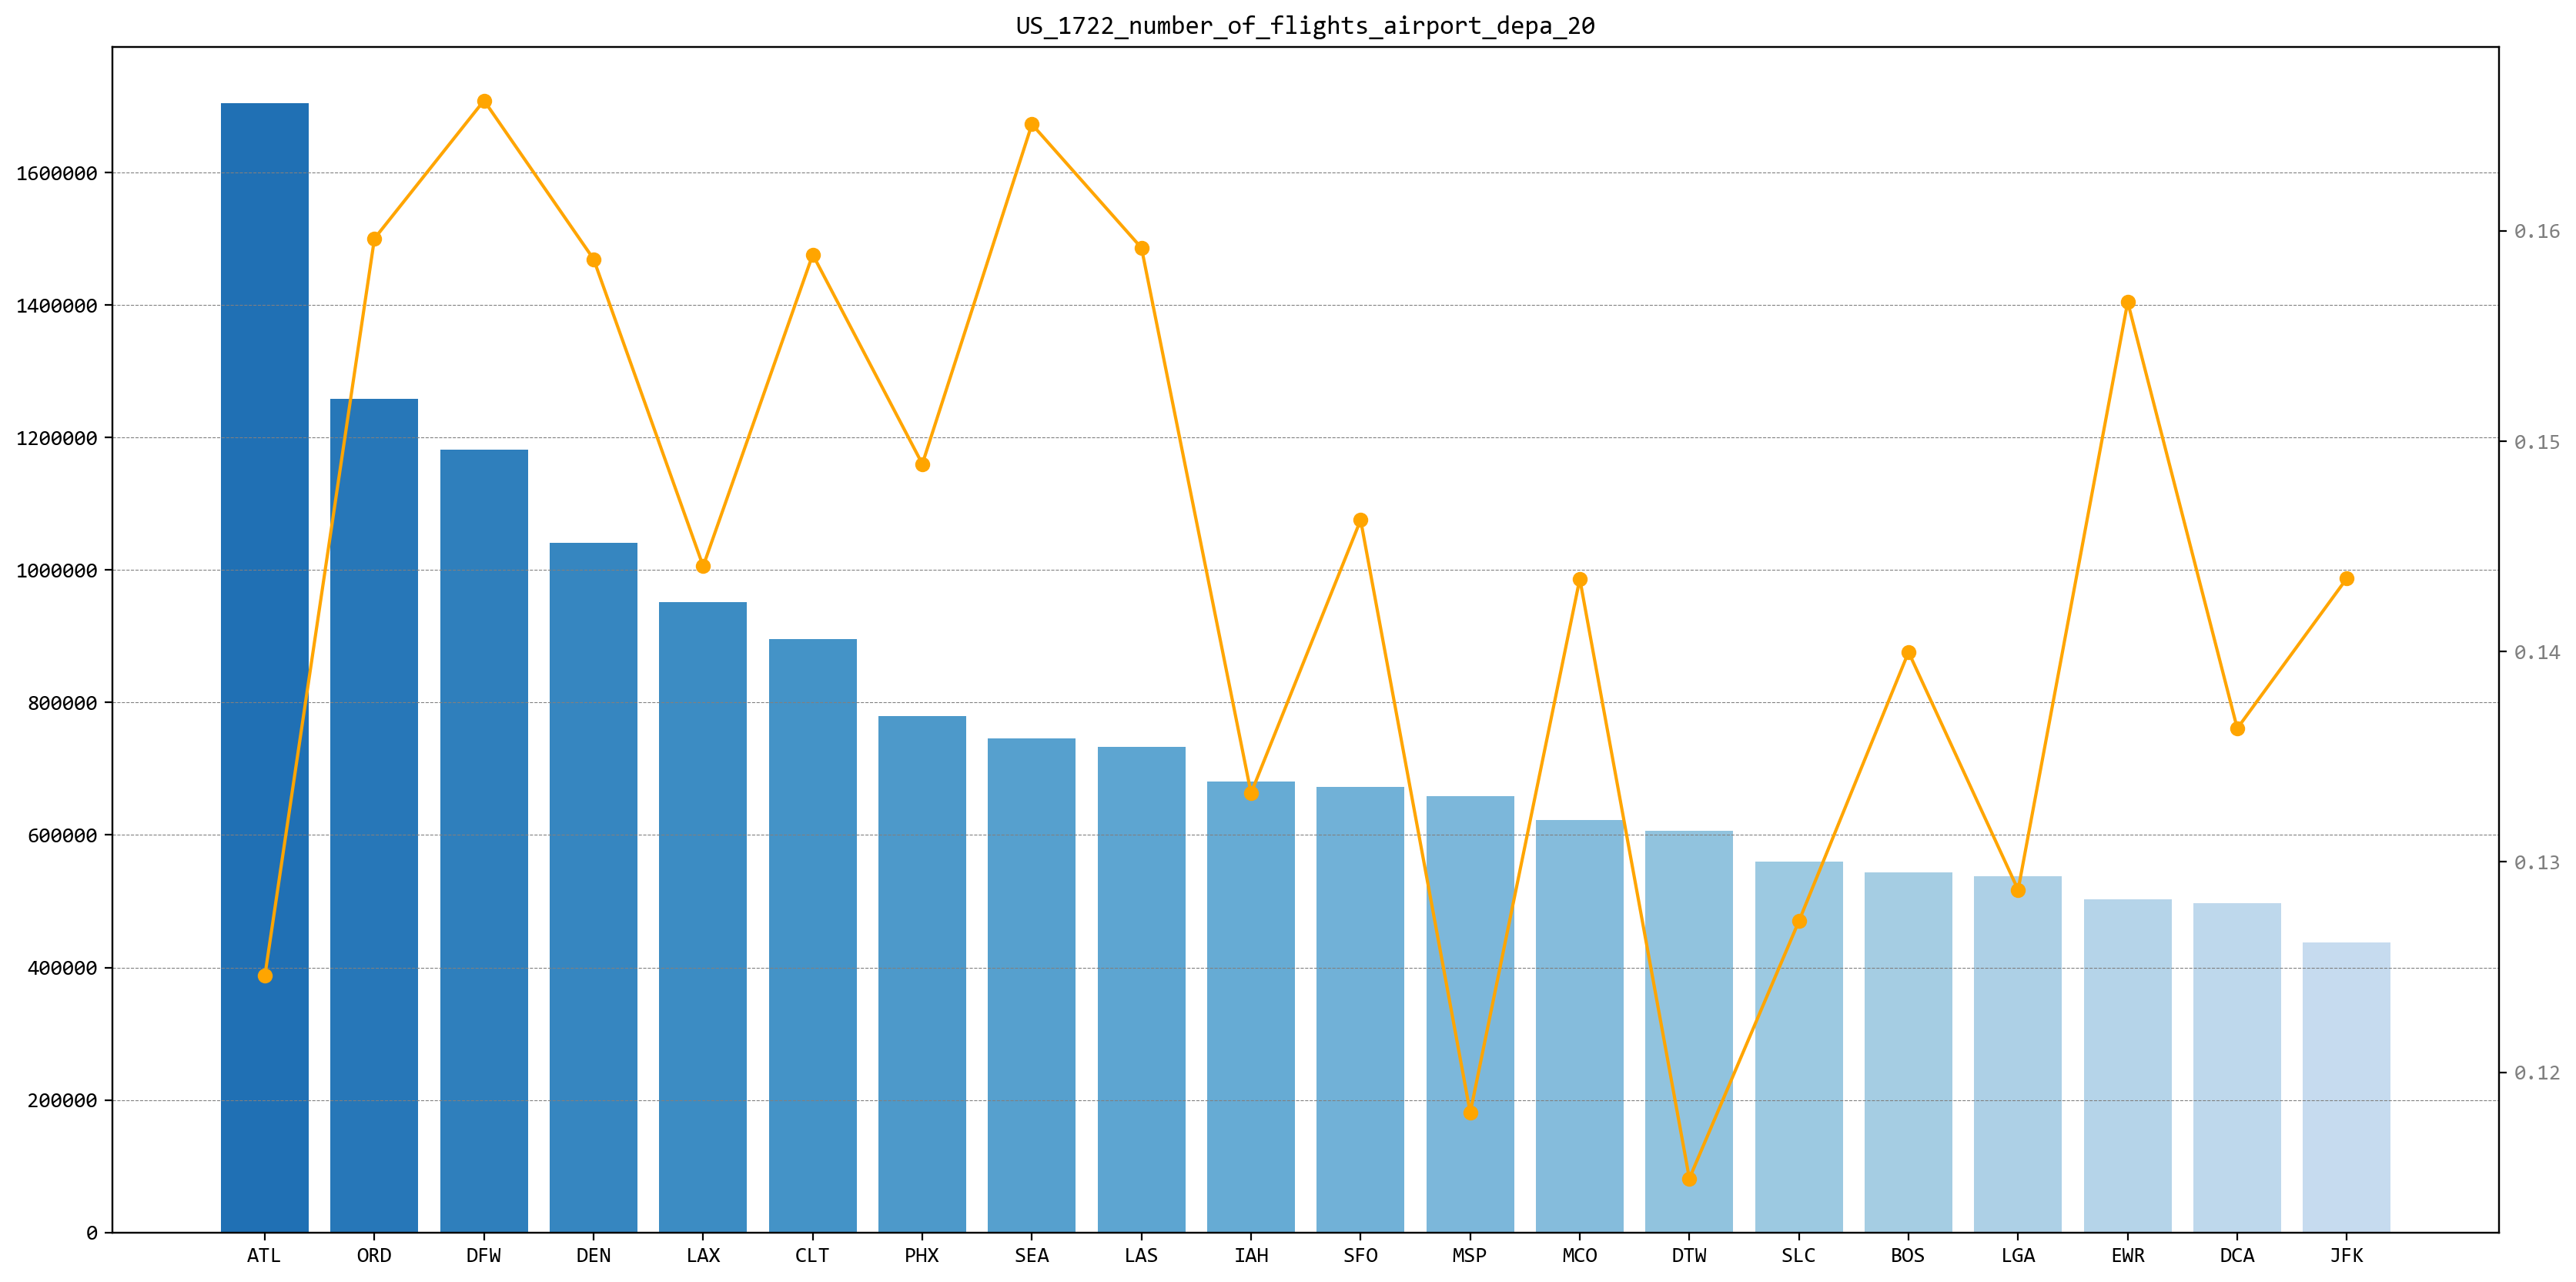

In [24]:
'''準備繪圖設定'''
# 清除 matplotlib 的繪圖緩存
plt.close()
# 建立新繪圖區、設定畫布大小
plt.figure(figsize=(20, 10))
# 設定字型：等寬字體
plt.rcParams['font.sans-serif'] = ['Consolas']
# 設定顏色：漸層
colors_depa = plt.cm.Blues(np.linspace(0.75, 0.25, len(df_airport_depa_20['airport_depa'])))


'''長條圖'''
# 繪圖
bar_depa = plt.bar(df_airport_depa_20['airport_depa'],
                   df_airport_depa_20['flights'],
                   color=colors_depa)
# 設定 y 軸：標籤不顯示科學符號
plt.ticklabel_format(style='plain',
                     axis='y')
# 設定輔助線
plt.grid(True,
         axis='y',
         lw=.4,
         ls='--',
         c='gray')


'''折線圖：【延誤比率】'''
# 建立一個與現有圖形共享 x 軸但擁有獨立 y 軸的圖形
lin = plt.gca().twinx()
# 設定內容：x 軸
x_lin = df_airport_depa_20['airport_depa']
# 設定內容：y 軸
y_lin = df_airport_depa_20['delay_rate']
# 繪圖
lin.plot(x_lin,
         y_lin,
         color='orange',
         marker='o')
# 設定標籤：y 軸
lin.tick_params(axis='y',
                labelcolor='gray')


'''繪圖輸出'''
# 設定圖表名稱
plt.title('US_1722_number_of_flights_airport_depa_20')
# 顯示圖表
plt.show()
# # 另存新檔
# plt.savefig('../imgs/US_1722_number_of_flights_airport_depa_20.png')

dest 機場 依【航班總數】排名的【航班總數】

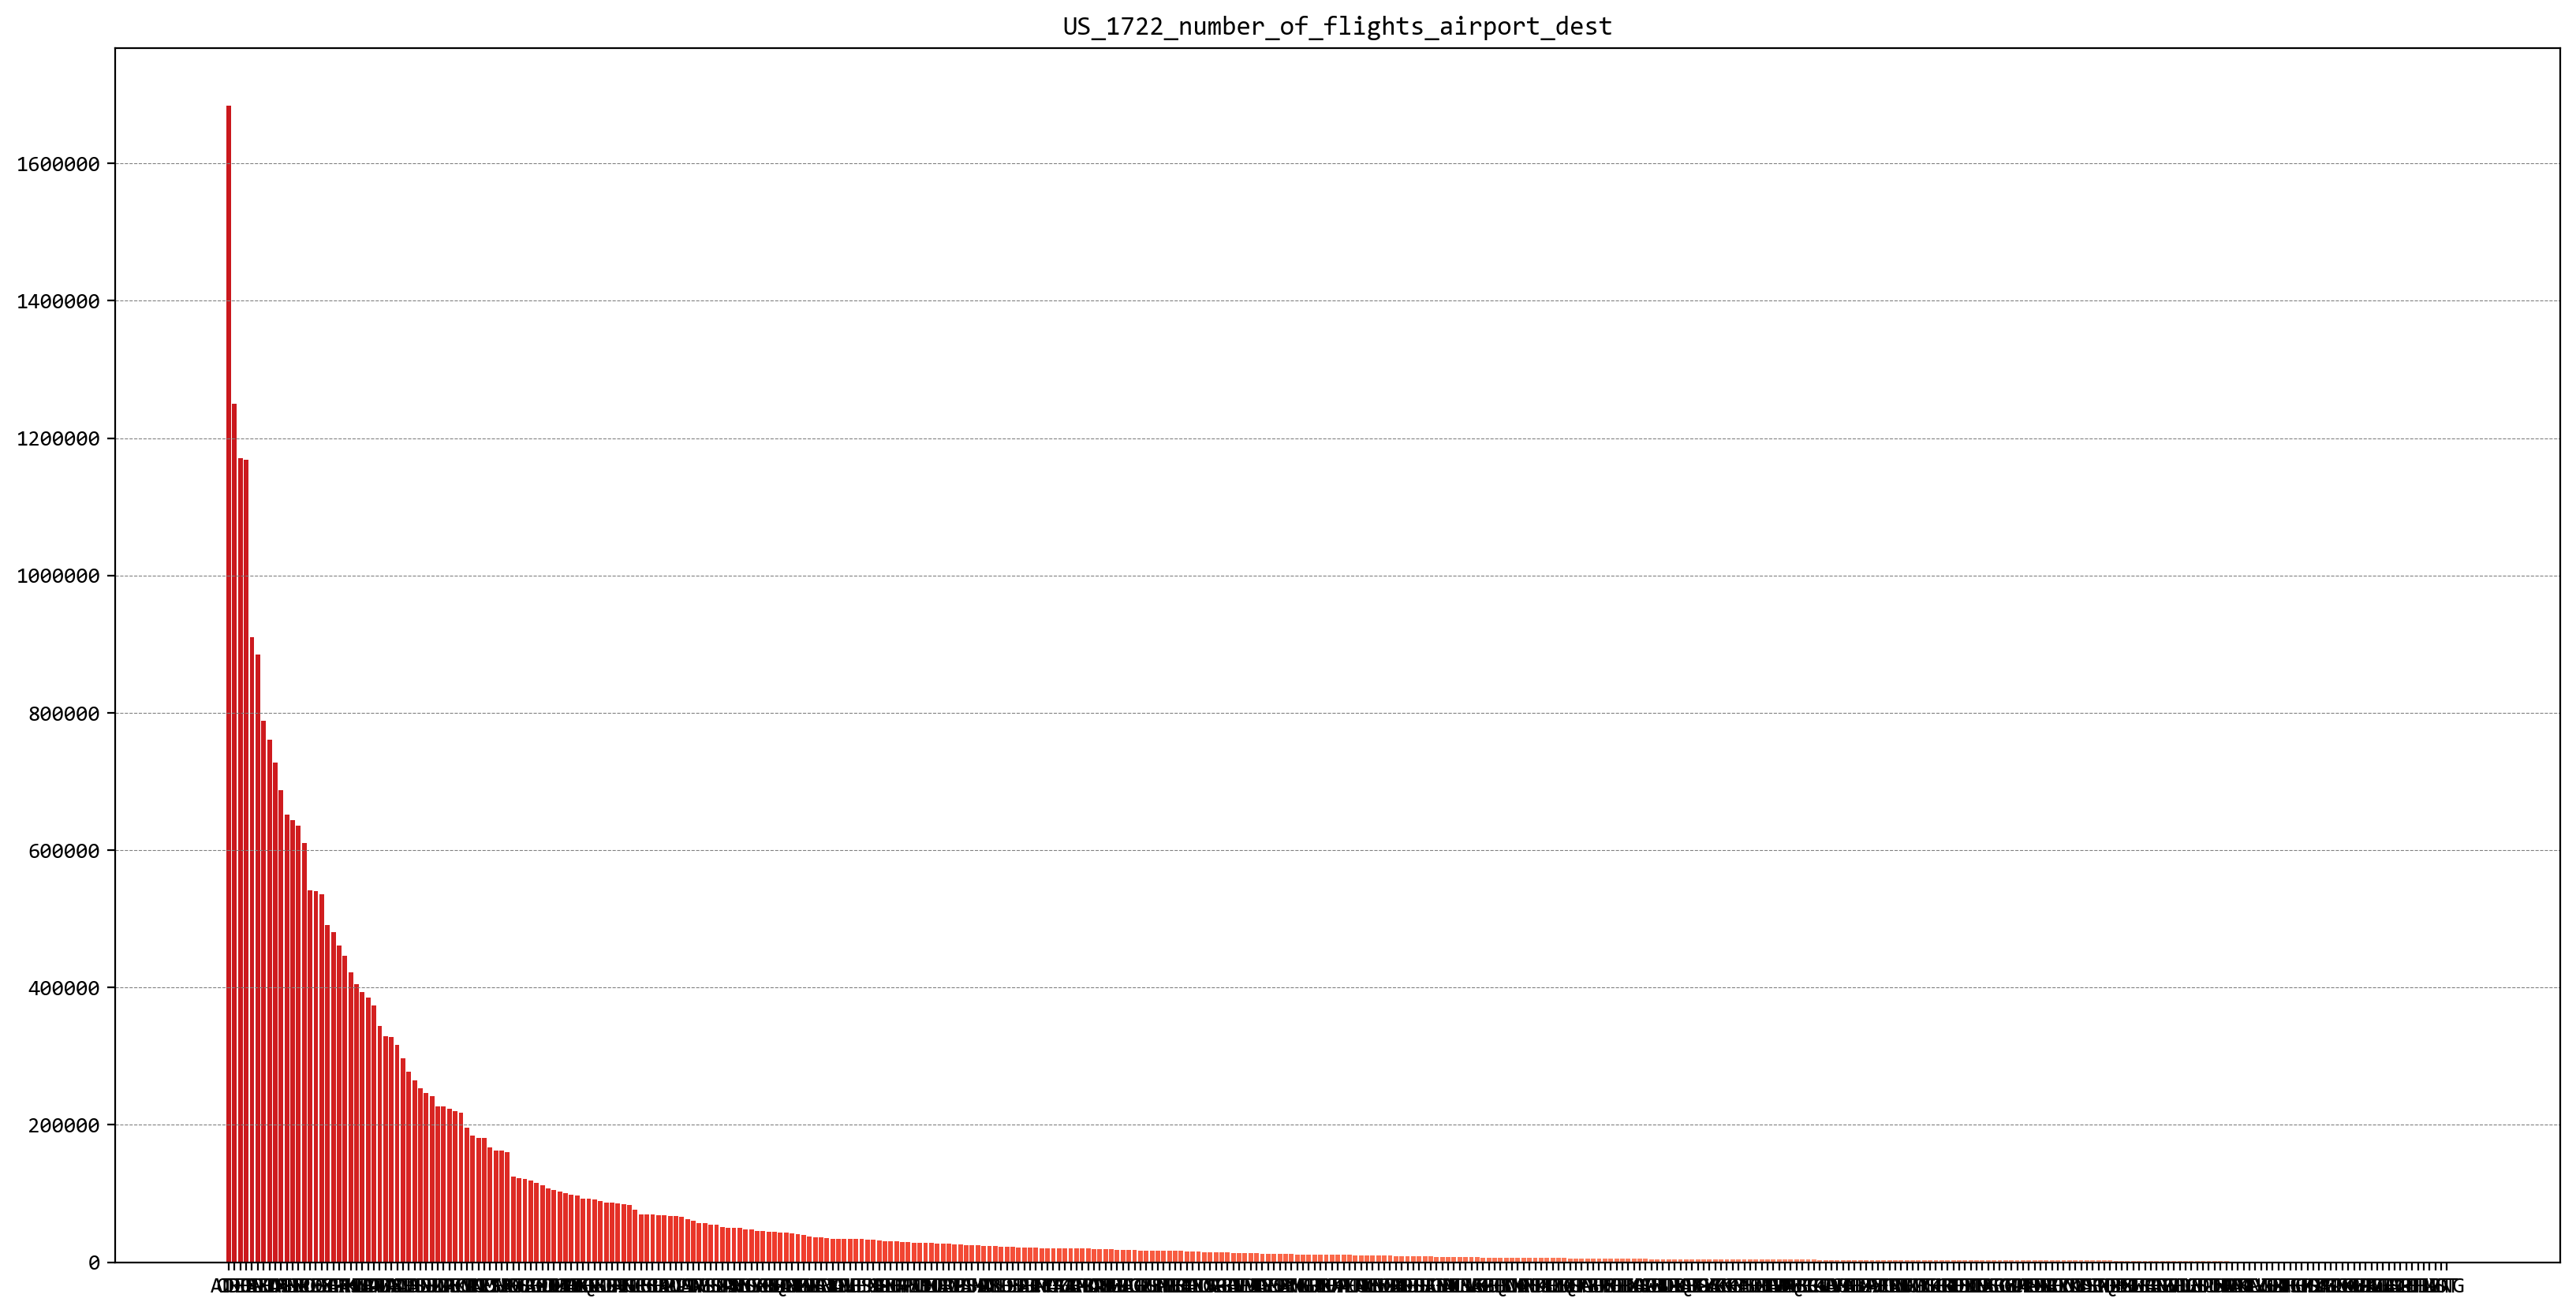

In [25]:
'''準備繪圖設定'''
# 清除 matplotlib 的繪圖緩存
plt.close()
# 建立新繪圖區、設定畫布大小
plt.figure(figsize=(20, 10))
# 設定字型：等寬字體
plt.rcParams['font.sans-serif'] = ['Consolas']
# 設定顏色：漸層
colors_depa = plt.cm.Reds(np.linspace(0.75, 0.25, len(df_airport_dest['airport_dest'])))


'''長條圖'''
# 繪圖
bar_dest = plt.bar(df_airport_dest['airport_dest'],
                   df_airport_dest['flights'],
                   color=colors_depa)
# 設定 y 軸：標籤不顯示科學符號
plt.ticklabel_format(style='plain',
                     axis='y')
# 設定輔助線
plt.grid(True,
         axis='y',
         lw=.4,
         ls='--',
         c='gray')


'''繪圖輸出'''
# 設定圖表名稱
plt.title('US_1722_number_of_flights_airport_dest')
# 顯示圖表
plt.show()
# # 另存新檔
# plt.savefig('../imgs/US_1722_number_of_flights_airport_dest.png')

depa 機場 依【航班總數前20名】排名的【航班總數】、【延誤比率】

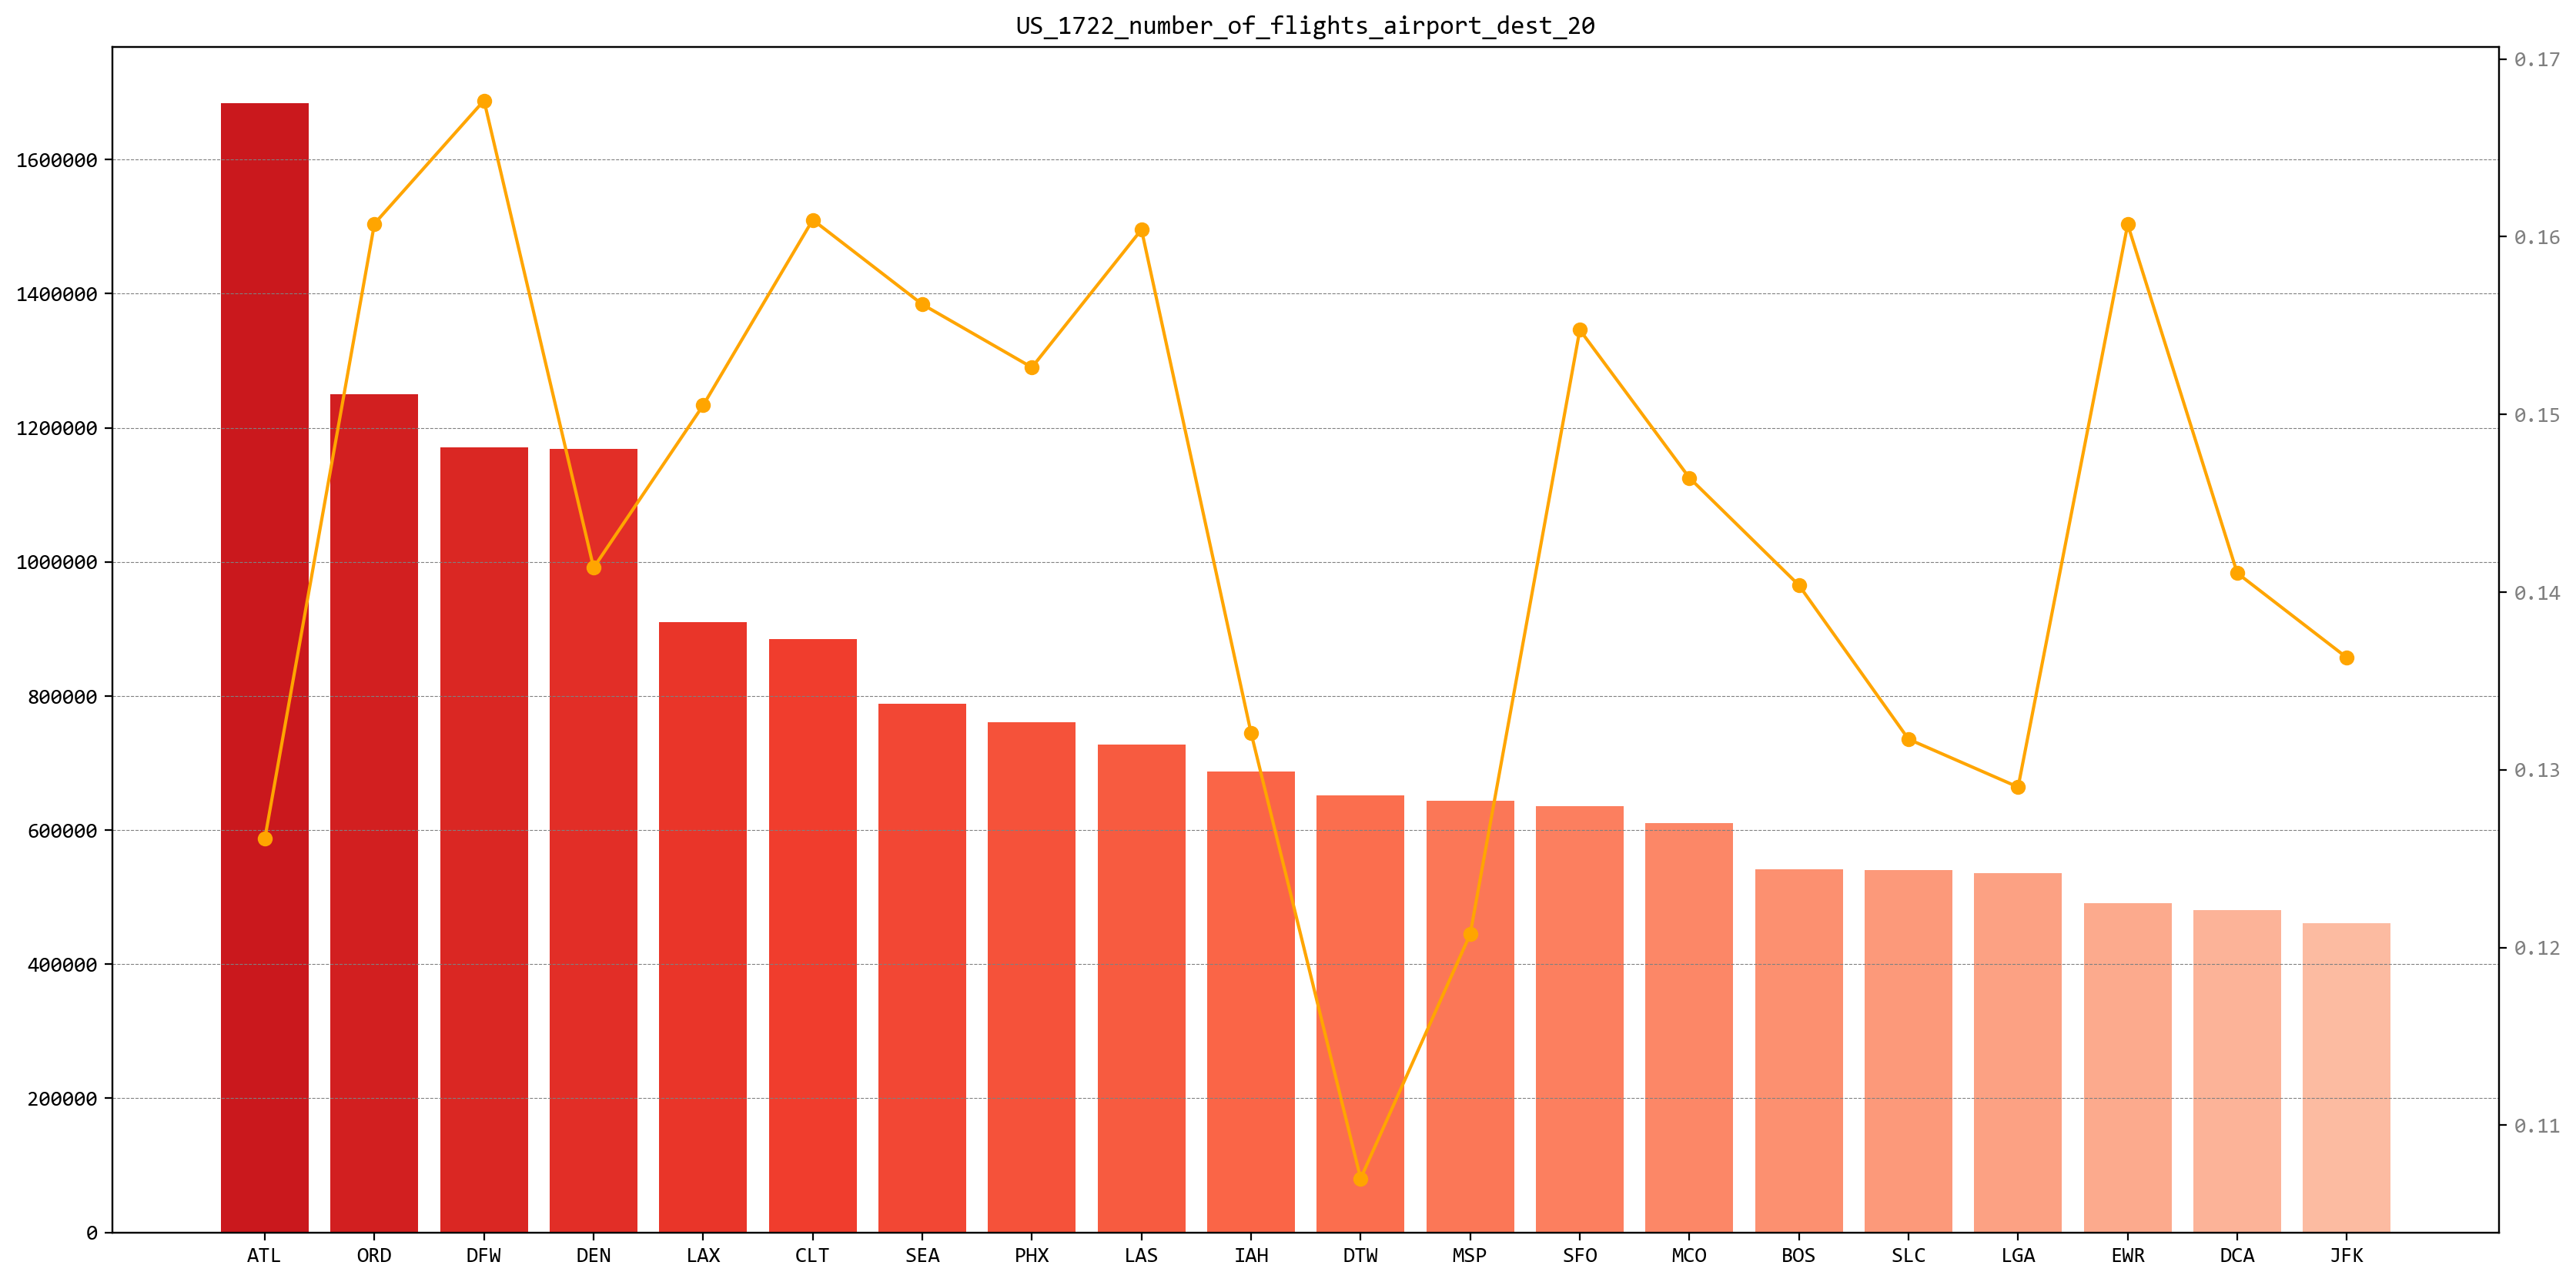

In [27]:
'''準備繪圖設定'''
# 清除 matplotlib 的繪圖緩存
plt.close()
# 建立新繪圖區、設定畫布大小
plt.figure(figsize=(20, 10))
# 設定字型：等寬字體
plt.rcParams['font.sans-serif'] = ['Consolas']
# 設定顏色：漸層
colors_depa = plt.cm.Reds(np.linspace(0.75, 0.25, len(df_airport_dest_20['airport_dest'])))


'''長條圖'''
# 繪圖
bar_depa = plt.bar(df_airport_dest_20['airport_dest'],
                   df_airport_dest_20['flights'],
                   color=colors_depa)
# 設定 y 軸：標籤不顯示科學符號
plt.ticklabel_format(style='plain',
                     axis='y')
# 設定輔助線
plt.grid(True,
         axis='y',
         lw=.4,
         ls='--',
         c='gray')


'''折線圖：【延誤比率】'''
# 建立一個與現有圖形共享 x 軸但擁有獨立 y 軸的圖形
lin = plt.gca().twinx()
# 設定內容：x 軸
x_lin = df_airport_dest_20['airport_dest']
# 設定內容：y 軸
y_lin = df_airport_dest_20['delay_rate']
# 繪圖
lin.plot(x_lin,
         y_lin,
         color='orange',
         marker='o')
# 設定標籤：y 軸
lin.tick_params(axis='y',
                labelcolor='gray')


'''繪圖輸出'''
# 設定圖表名稱
plt.title('US_1722_number_of_flights_airport_dest_20')
# 顯示圖表
plt.show()
# # 另存新檔
# plt.savefig('../imgs/US_1722_number_of_flights_airport_dest_20.png')